In [113]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [115]:
lead=pd.read_csv('/content/Leads_TimeSeries_Oye!.csv',date_parser=dateparse)

In [116]:
lead

,date,lead_source,count
0,2020-06-01,CBOB,1
1,2020-06-01,Driver App installation,16
2,2020-06-01,Driver Referral,29
3,2020-06-01,Operator app,12
4,2020-06-02,Driver App installation,26
...,...,...,...
1301,2021-04-30,Driver App installation,5
1302,2021-04-30,Driver Referral,1
1303,2021-05-01,Driver App installation,11
1304,2021-05-01,Driver Referral,3


**CONSIDERED DATA FROM 1/1/21-15/4/21**

In [117]:
lead=lead[(lead['date']>='2021-01-01') & (lead['date']<='2021-04-15')]

In [118]:
lead.drop('lead_source',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [119]:
lead.describe()

,count
count,401.000000
mean,17.049875
std,29.893018
min,1.000000
25%,5.000000
50%,11.000000
75%,20.000000
max,360.000000


In [120]:
lead=lead.groupby('date').sum()['count'].reset_index()


In [121]:
lead.head(20)

,date,count
0,2021-01-01,19
1,2021-01-02,29
2,2021-01-03,18
3,2021-01-04,198
4,2021-01-05,32
5,2021-01-06,37
6,2021-01-07,32
7,2021-01-08,20
8,2021-01-09,63
9,2021-01-10,6


In [122]:
lead.tail(20)

,date,count
85,2021-03-27,64
86,2021-03-28,16
87,2021-03-29,49
88,2021-03-30,60
89,2021-03-31,39
90,2021-04-01,19
91,2021-04-02,26
92,2021-04-03,49
93,2021-04-04,19
94,2021-04-05,77


In [123]:
lead.describe()

,count
count,105.000000
mean,65.114286
std,56.024774
min,6.000000
25%,34.000000
50%,51.000000
75%,77.000000
max,396.000000


In [124]:
lead.to_csv('LeadData.csv')

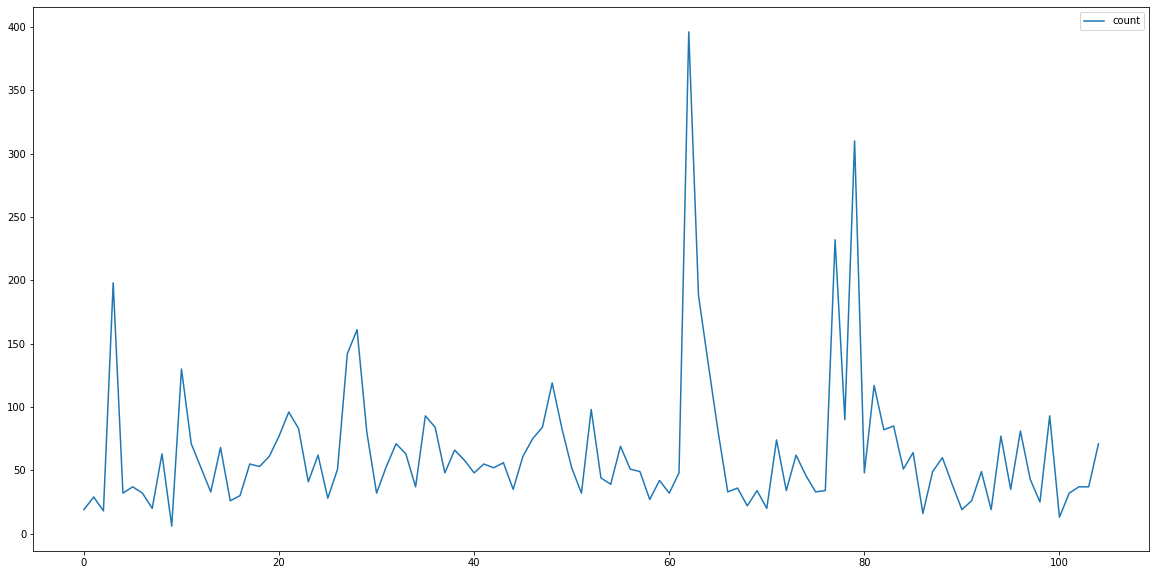

In [125]:
lead.plot(figsize=(20,10))

In [126]:
lead['date']=pd.to_datetime(lead['date'])

In [127]:
lead.set_index('date',inplace=True)

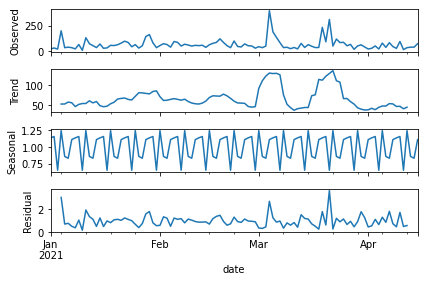

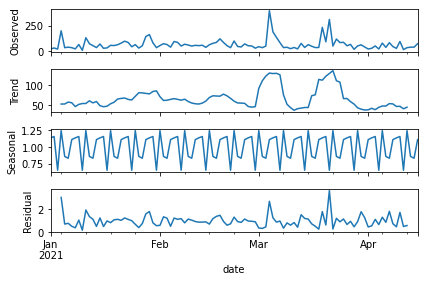

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(lead, model='multiplicative')
result.plot()

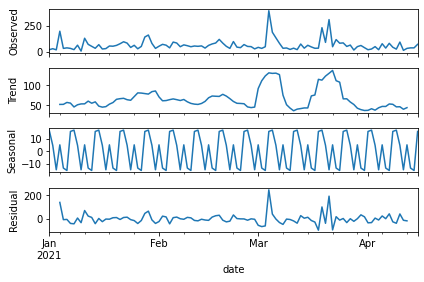

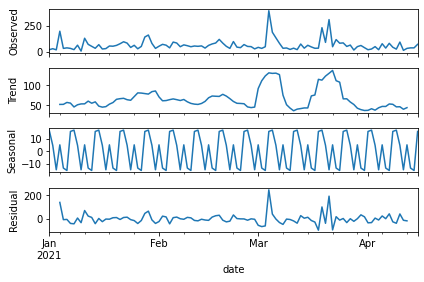

In [129]:
result = seasonal_decompose(lead, model='additive')
result.plot()

**Augmented Dickey Fuller Test**

```
Hypothesis Testing
H0: Non Stationary Data
H1: Stationary Data
5% Level of Significance
```




In [130]:
from statsmodels.tsa.stattools import adfuller

In [131]:
res=adfuller(lead['count'])

In [132]:
def adfuller_test(count):
  result=adfuller(count)
  labels=['ADF Test Statistic','p value','Number of Lags Used','Number of Observations used']
  for i,label in zip(result,labels):
    print(label+':'+str(i))

     
  if result[1]<=0.05:
     print("Reject Null Hypothesis")
  else:
    print("Accept Null Hypothesis")

In [133]:
adfuller_test(lead['count'])

ADF Test Statistic:-5.507587422663742
p value:2.0055966380032986e-06
Number of Lags Used:2
Number of Observations used:102
Reject Null Hypothesis


**Differenciation**

```
Non Stationary -> Stationary
```



In [134]:
lead['Lead Count']=lead['count']-lead['count'].shift(1)

In [135]:
lead

,count,Lead Count
date,,
2021-01-01,19,NaN
2021-01-02,29,10.0
2021-01-03,18,-11.0
2021-01-04,198,180.0
2021-01-05,32,-166.0
...,...,...
2021-04-11,13,-80.0
2021-04-12,32,19.0
2021-04-13,37,5.0


In [136]:
lead['count'].values

array([ 19,  29,  18, 198,  32,  37,  32,  20,  63,   6, 130,  71,  52,
        33,  68,  26,  30,  55,  53,  61,  77,  96,  83,  41,  62,  28,
        51, 142, 161,  80,  32,  53,  71,  63,  37,  93,  84,  48,  66,
        58,  48,  55,  52,  56,  35,  61,  75,  84, 119,  83,  52,  32,
        98,  44,  39,  69,  51,  49,  27,  42,  32,  48, 396, 188, 134,
        81,  33,  36,  22,  34,  20,  74,  34,  62,  46,  33,  34, 232,
        90, 310,  48, 117,  82,  85,  51,  64,  16,  49,  60,  39,  19,
        26,  49,  19,  77,  35,  81,  43,  25,  93,  13,  32,  37,  37,
        71])

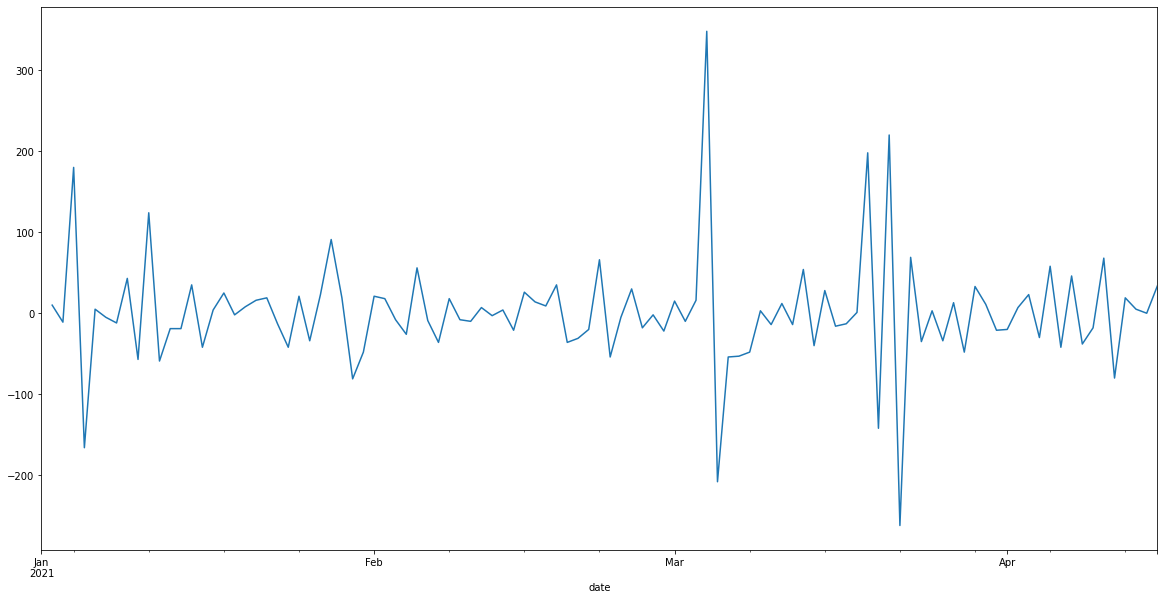

In [137]:
lead['Lead Count'].plot(figsize=(20,10))

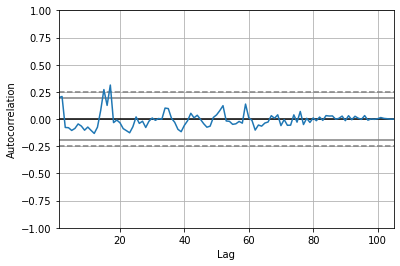

In [138]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(lead['count'])

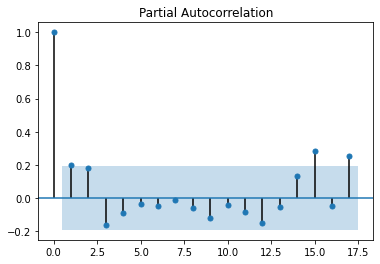

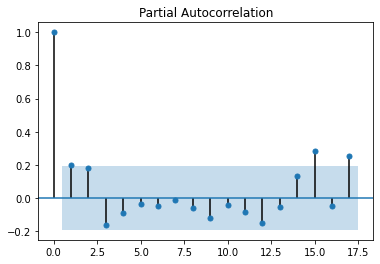

In [139]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lead['count'],lags=17)

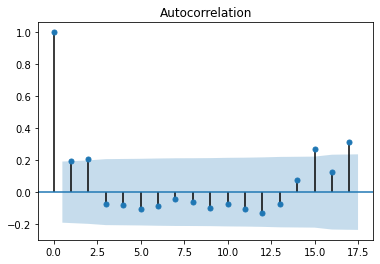

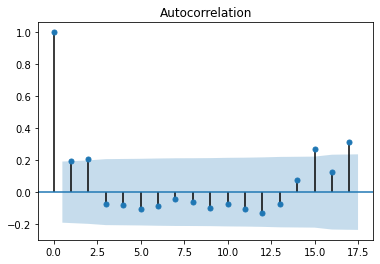

In [140]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(lead['count'],lags=17)

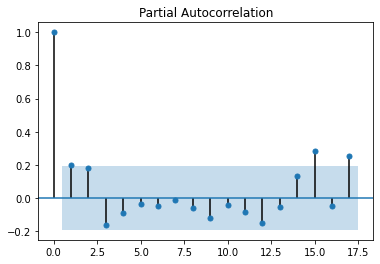

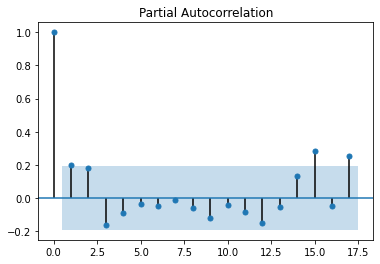

In [141]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lead['count'],lags=17)

**ARIMA MODEL (P=2,D=1,Q=2)**

In [142]:
from statsmodels.tsa.arima_model import ARIMA

In [143]:
model=ARIMA(lead['count'],order=(2,1,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [144]:
model_fit=model.fit()

In [145]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  104
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -563.888
Method:                       css-mle   S.D. of innovations             53.726
Date:                Sun, 06 Jun 2021   AIC                           1139.777
Time:                        13:02:14   BIC                           1155.643
Sample:                    01-02-2021   HQIC                          1146.205
                         - 04-15-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0476      0.256      0.186      0.852      -0.453       0.548
ar.L1.D.count    -0.1720      0.307     -0.560      0.577      -0.774       0.430
ar.L2.D.count     0.2699      0.102      2.653      0.009       0.070       0.469
ma.L1.D.count    -0.6424      0.310     -2.070      0.041      -1.251      -0.034
ma.L2.D.count    -0.3575      0.309     -1.157      0.250      -0.963       0.248
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6323           +0.0000j            1.6323            0.5000
AR.2            2.2695           +0.0000j            2.2695            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -2.7968           +0.0000j            2.7968            0.5000
-----------------------------------------------------------------------------
"""

**PREDICTING FROM 16/4/21-30/7/21**

In [149]:
future=pd.date_range(start='2021-04-16',end='2021-07-30')

In [150]:
p=model_fit.predict(start=len(lead) ,end=len(lead)+105,typ='levels')

In [151]:
p.index=future

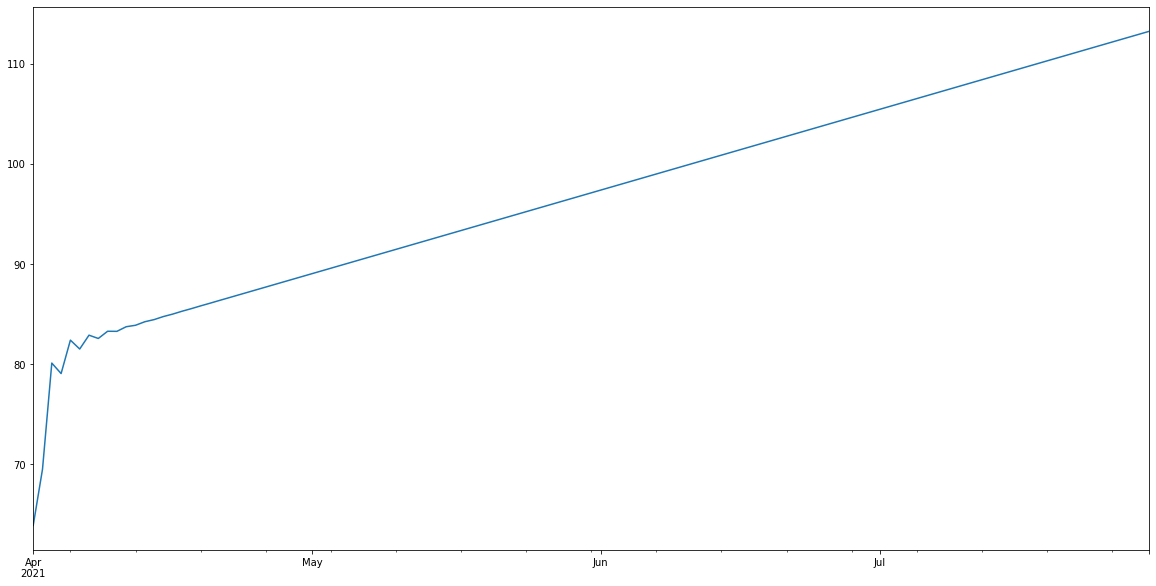

In [75]:
p.plot(figsize=(20,10))

In [152]:
p.values

array([63.7600652 , 68.95192509, 66.14751701, 68.07436403, 67.02889065,
       67.77183263, 67.40480672, 67.71146797, 67.60262564, 67.74710796,
       67.73585564, 67.81977322, 67.84528191, 67.9065275 , 67.9458592 ,
       67.99860706, 68.0431318 , 68.09269255, 68.13916731, 68.18753231,
       68.23473914, 68.28265543, 68.33013706, 68.37788496, 68.42546973,
       68.47315444, 68.52077792, 68.56843891, 68.61607692, 68.66372901,
       68.71137248, 68.75902122, 68.80666674, 68.85431423, 68.90196051,
       68.94960753, 68.9972541 , 69.04490095, 69.09254762, 69.1401944 ,
       69.18784112, 69.23548787, 69.2831346 , 69.33078135, 69.37842809,
       69.42607483, 69.47372157, 69.52136831, 69.56901505, 69.61666179,
       69.66430853, 69.71195527, 69.75960201, 69.80724875, 69.85489549,
       69.90254223, 69.95018897, 69.99783571, 70.04548245, 70.0931292 ,
       70.14077594, 70.18842268, 70.23606942, 70.28371616, 70.3313629 ,
       70.37900964, 70.42665638, 70.47430312, 70.52194986, 70.56

In [153]:
predicted=pd.DataFrame(p)

In [157]:
predicted.columns=['Target Leads']


In [158]:
predicted

,Target Leads
2021-04-16,63.760065
2021-04-17,68.951925
2021-04-18,66.147517
2021-04-19,68.074364
2021-04-20,67.028891
...,...
2021-07-26,72.094292
2021-07-27,72.141939
2021-07-28,72.189586
2021-07-29,72.237233


In [160]:
predicted.to_csv('Predicted_Jan_Apr.csv')